<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P6E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

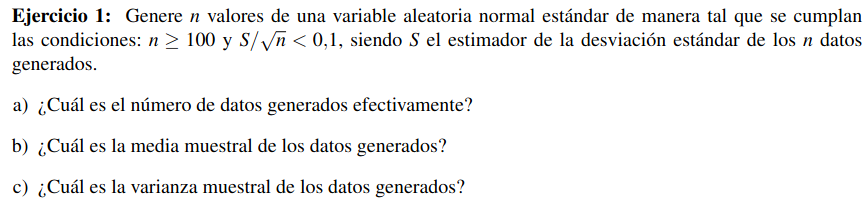

In [7]:
from random import random, seed
import numpy as np

seed(1)

def normal_AyR(media=0, varianza=1):
  while True:
    muestra = -np.log(1 - random())
    u = -np.log(1 - random())
    if u >= (muestra - 1)**2 / 2:
      n = muestra * varianza
      return  media + n if random() < 0.5 else media - n

def estimar_estadisticas_con_n(n):
  muestras = [normal_AyR() for _ in range(n)]
  media = sum(muestras) / n
  varianza = sum([(muestra - media)**2 for muestra in muestras]) / n
  desviacion_estandar = np.sqrt(varianza)
  return media, varianza, desviacion_estandar, n

def estimar_estadisticas_muestrales_con_d(d):
  #Estimacion de E[X] con desvıo estandar d
  media = normal_AyR()
  Scuad, n = 0, 1 #Scuad = Sˆ2(1)

  while n <= 100 or np.sqrt(Scuad/n) > d:
    n += 1
    nueva_muestra = normal_AyR()
    media_anterior = media
    media = media_anterior + (nueva_muestra - media_anterior) / n
    Scuad = Scuad * (1 - 1 /(n-1)) + n*(media - media_anterior)**2
  return media, Scuad, np.sqrt(Scuad), n

media, Scuad, S, n = estimar_estadisticas_muestrales_con_d(0.1)
print(f"Media: {media:.4f} Varianza: {Scuad:.4f} Deviacion estandar: {S:.4f} Iteraciones: {n}")
media, Scuad, S, n = estimar_estadisticas_con_n(n)
print(f"Media: {media:.4f} Varianza: {Scuad:.4f} Deviacion estandar: {S:.4f} Iteraciones: {n}")

# teorico:
print(f"Media: 0      Varianza: 1      Deviacion estandar: 1")


Media: 0.1200 Varianza: 0.8694 Deviacion estandar: 0.9324 Iteraciones: 101
Media: 0.0101 Varianza: 1.1769 Deviacion estandar: 1.0849 Iteraciones: 101
Media: 0      Varianza: 1      Deviacion estandar: 1
